In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df= pd.read_csv('../csv/after_cleaning/mubawab_preprocessed.csv')
df.head()

,delegation,superficie,chambres,salle_de_bains,etat,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,26.0,88,2,1,9,1,0.0,0.0,0.0,1.0,340000.0
1,23.0,100,2,1,9,1,0.0,0.0,0.0,1.0,135000.0
2,36.0,152,2,1,9,1,0.0,0.0,0.0,1.0,680000.0
3,36.0,120,1,1,9,1,0.0,0.0,0.0,1.0,470000.0
4,31.0,145,3,1,11,4,0.0,0.0,0.0,1.0,260000.0


**scaling and train test split**

In [8]:
X= df.drop(columns='prix')

y= df['prix']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [10]:
model= LinearRegression()

model.fit(X_train_scaled, y_train)

y_hat= model.predict(X_test_scaled)

In [17]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
r2 = r2_score(y_test, y_hat)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R²: {r2}")


Mean Absolute Error (MAE): 127936.95827432355
Root Mean Squared Error (RMSE): 208152.63274977752
Mean Squared Error (MSE): 43327518520.66376
R²: 0.5983472885473582


**R² is around 60% , this means that LR model explains about 60% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**feature importance**

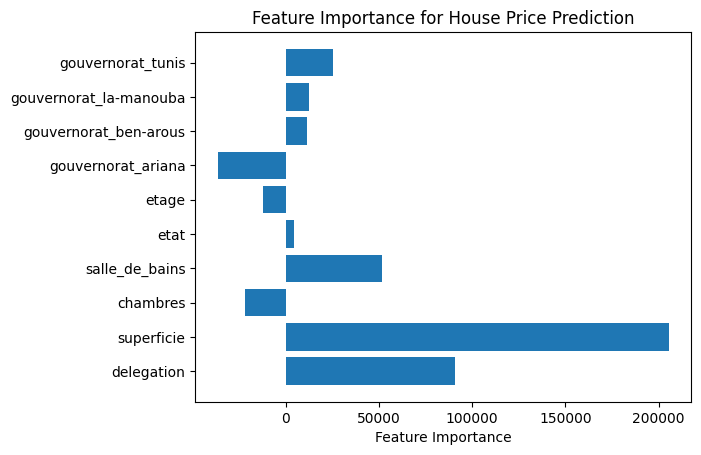

In [20]:

feature_importance = model.coef_
features = X.columns 

plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for House Price Prediction')
plt.show()


**learning curve**

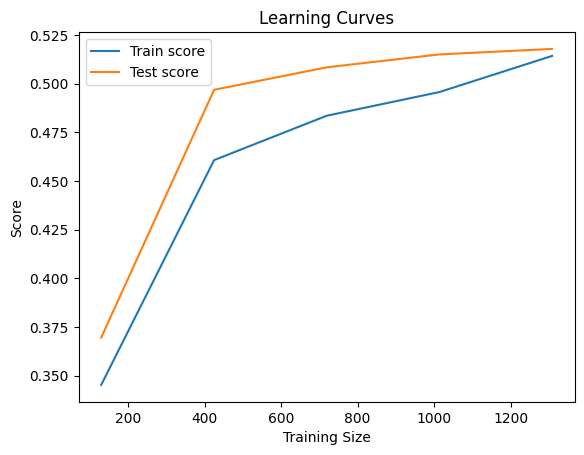

In [19]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()
